# PRINCIPAL COMPONENT ANALYSIS

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_columns', None)

## DataSet

In [14]:
df = pd.read_csv('ece-data.csv')
df.head(5)

,No.,Residence,ALGEBRA,TRIGO,ADVALGEBRA,ANAGEO,DIFCAL,INTCAL,DIFEQU,STATS,ADVENGMAT,NUMERICAL,MATAVERAGE,PHY01A,PHY02A,ENG01,ENG02A,ENG03A,ENGECO,VECTOR,ELXDEVICE,ELXCIRCUITS,SIGNALS,PRINCO,LCST,DIGICOM,TRANS,MICRO,BROADCAST,CONTROLSYS,ECEAVERAGE,CIRC1,ELEMAG,CIRC2,ELEAVERAGE,VA,VR,FR,QR,SCHEME,On-Time,WithHonors,Passer
0,1,lucban,3.00,3.00,2.75,2.25,3.00,3.00,2.75,2.75,2.25,2.25,2.70,3.00,3.00,2.75,3.00,3.00,3.00,3.00,3.00,3.0,3.0,3.00,3.00,2.75,2.75,3.00,2.75,3.00,2.925,3.0,3.00,2.25,2.750000,A,A,AA,A,A,NO,NO,NO
1,2,luisiana,2.75,3.00,3.00,3.00,3.00,2.75,3.00,3.00,3.00,2.50,2.90,3.00,3.00,2.50,3.00,2.25,3.00,2.00,2.25,3.0,3.0,3.00,1.75,1.75,3.00,3.00,3.00,2.75,2.650,3.0,2.25,1.75,2.333333,A,A,A,A,A,NO,NO,NO
2,3,lucban,1.50,1.50,1.25,1.25,1.75,1.50,1.75,1.75,1.50,2.00,1.58,1.75,1.75,1.25,1.50,2.00,1.75,2.25,1.50,1.5,1.5,1.50,1.75,1.25,1.75,2.25,2.25,2.00,1.725,1.5,1.00,1.50,1.333333,AA,AA,AA,AA,A,YES,YES,YES
3,4,lucena,2.25,2.50,2.25,3.00,2.25,2.50,2.75,3.00,2.00,1.75,2.43,2.75,3.00,2.25,3.00,2.25,3.00,2.50,3.00,3.0,3.0,2.00,3.00,1.75,2.75,3.00,3.00,2.75,2.725,3.0,2.00,2.25,2.416667,A,AA,A,AA,A,NO,NO,YES
4,5,atimonan,2.00,2.25,2.25,2.25,2.50,2.00,2.50,3.00,1.75,2.00,2.25,2.75,2.50,3.00,1.75,3.00,2.50,3.00,2.00,2.5,2.5,1.75,2.25,2.00,2.00,3.00,3.00,2.75,2.375,2.5,2.75,2.25,2.500000,AA,A,A,A,B,YES,NO,NO


## Preprocessing

In [17]:
# Label Encoding (Manual)

encoded_exam = df[['VA','VR','FR','QR']].replace(['AA','A','BA'],[1,2,3])
encoded_scheme = df['SCHEME'].replace(['C','B','A'],[1,2,3])
encoded_on_time = df['On-Time'].replace(['NO','YES'],[2,1])
encoded_with_honors = df['WithHonors'].replace(['NO','YES'],[2,1])
encoded_passer = df['Passer'].replace(['NO','YES'],[2,1])

In [20]:
# Drop Non-Encoded Columns

new_df = df.drop(['No.','Residence','VA','VR','FR','QR','SCHEME','On-Time','WithHonors','Passer'], axis = 1)
new_df.head(5)

,ALGEBRA,TRIGO,ADVALGEBRA,ANAGEO,DIFCAL,INTCAL,DIFEQU,STATS,ADVENGMAT,NUMERICAL,MATAVERAGE,PHY01A,PHY02A,ENG01,ENG02A,ENG03A,ENGECO,VECTOR,ELXDEVICE,ELXCIRCUITS,SIGNALS,PRINCO,LCST,DIGICOM,TRANS,MICRO,BROADCAST,CONTROLSYS,ECEAVERAGE,CIRC1,ELEMAG,CIRC2,ELEAVERAGE
0,3.00,3.00,2.75,2.25,3.00,3.00,2.75,2.75,2.25,2.25,2.70,3.00,3.00,2.75,3.00,3.00,3.00,3.00,3.00,3.0,3.0,3.00,3.00,2.75,2.75,3.00,2.75,3.00,2.925,3.0,3.00,2.25,2.750000
1,2.75,3.00,3.00,3.00,3.00,2.75,3.00,3.00,3.00,2.50,2.90,3.00,3.00,2.50,3.00,2.25,3.00,2.00,2.25,3.0,3.0,3.00,1.75,1.75,3.00,3.00,3.00,2.75,2.650,3.0,2.25,1.75,2.333333
2,1.50,1.50,1.25,1.25,1.75,1.50,1.75,1.75,1.50,2.00,1.58,1.75,1.75,1.25,1.50,2.00,1.75,2.25,1.50,1.5,1.5,1.50,1.75,1.25,1.75,2.25,2.25,2.00,1.725,1.5,1.00,1.50,1.333333
3,2.25,2.50,2.25,3.00,2.25,2.50,2.75,3.00,2.00,1.75,2.43,2.75,3.00,2.25,3.00,2.25,3.00,2.50,3.00,3.0,3.0,2.00,3.00,1.75,2.75,3.00,3.00,2.75,2.725,3.0,2.00,2.25,2.416667
4,2.00,2.25,2.25,2.25,2.50,2.00,2.50,3.00,1.75,2.00,2.25,2.75,2.50,3.00,1.75,3.00,2.50,3.00,2.00,2.5,2.5,1.75,2.25,2.00,2.00,3.00,3.00,2.75,2.375,2.5,2.75,2.25,2.500000


In [21]:
# Concatenate Encoded Columns

new_df = pd.concat([new_df, encoded_exam, encoded_scheme, encoded_on_time, encoded_with_honors, encoded_passer], axis = 1)
new_df.head(5)

,ALGEBRA,TRIGO,ADVALGEBRA,ANAGEO,DIFCAL,INTCAL,DIFEQU,STATS,ADVENGMAT,NUMERICAL,MATAVERAGE,PHY01A,PHY02A,ENG01,ENG02A,ENG03A,ENGECO,VECTOR,ELXDEVICE,ELXCIRCUITS,SIGNALS,PRINCO,LCST,DIGICOM,TRANS,MICRO,BROADCAST,CONTROLSYS,ECEAVERAGE,CIRC1,ELEMAG,CIRC2,ELEAVERAGE,VA,VR,FR,QR,SCHEME,On-Time,WithHonors,Passer
0,3.00,3.00,2.75,2.25,3.00,3.00,2.75,2.75,2.25,2.25,2.70,3.00,3.00,2.75,3.00,3.00,3.00,3.00,3.00,3.0,3.0,3.00,3.00,2.75,2.75,3.00,2.75,3.00,2.925,3.0,3.00,2.25,2.750000,2,2,1,2,3,2,2,2
1,2.75,3.00,3.00,3.00,3.00,2.75,3.00,3.00,3.00,2.50,2.90,3.00,3.00,2.50,3.00,2.25,3.00,2.00,2.25,3.0,3.0,3.00,1.75,1.75,3.00,3.00,3.00,2.75,2.650,3.0,2.25,1.75,2.333333,2,2,2,2,3,2,2,2
2,1.50,1.50,1.25,1.25,1.75,1.50,1.75,1.75,1.50,2.00,1.58,1.75,1.75,1.25,1.50,2.00,1.75,2.25,1.50,1.5,1.5,1.50,1.75,1.25,1.75,2.25,2.25,2.00,1.725,1.5,1.00,1.50,1.333333,1,1,1,1,3,1,1,1
3,2.25,2.50,2.25,3.00,2.25,2.50,2.75,3.00,2.00,1.75,2.43,2.75,3.00,2.25,3.00,2.25,3.00,2.50,3.00,3.0,3.0,2.00,3.00,1.75,2.75,3.00,3.00,2.75,2.725,3.0,2.00,2.25,2.416667,2,1,2,1,3,2,2,1
4,2.00,2.25,2.25,2.25,2.50,2.00,2.50,3.00,1.75,2.00,2.25,2.75,2.50,3.00,1.75,3.00,2.50,3.00,2.00,2.5,2.5,1.75,2.25,2.00,2.00,3.00,3.00,2.75,2.375,2.5,2.75,2.25,2.500000,1,2,2,2,2,1,2,2


## Data Scaling

In [22]:
# Import Standard Scaler

from sklearn.preprocessing import StandardScaler

In [23]:
# Remove Class Label

all_features_only = new_df.drop(['Passer'], axis = 1)

In [25]:
# Scale the Final Dataset withou the class labels

scaled_df = pd.DataFrame(StandardScaler().fit_transform(all_features_only), columns = all_features_only.columns)
scaled_df

,ALGEBRA,TRIGO,ADVALGEBRA,ANAGEO,DIFCAL,INTCAL,DIFEQU,STATS,ADVENGMAT,NUMERICAL,MATAVERAGE,PHY01A,PHY02A,ENG01,ENG02A,ENG03A,ENGECO,VECTOR,ELXDEVICE,ELXCIRCUITS,SIGNALS,PRINCO,LCST,DIGICOM,TRANS,MICRO,BROADCAST,CONTROLSYS,ECEAVERAGE,CIRC1,ELEMAG,CIRC2,ELEAVERAGE,VA,VR,FR,QR,SCHEME,On-Time,WithHonors
0,1.211025,1.003229,0.609940,-0.282556,0.816230,1.083632,0.872135,0.288167,0.857531,0.904534,0.945164,0.695097,0.995405,0.545467,1.248591,1.292463,1.037234,1.345322,1.331753,0.822620,0.959282,0.884067,1.002782,1.382851,0.893455,0.922836,-0.114206,0.931672,1.172948,1.105658,0.952587,0.544436,1.018973,0.561951,1.020755,-1.894091,0.632983,0.700740,1.975338,0.257095
1,0.735367,1.003229,1.095098,1.051094,0.816230,0.619748,1.341024,0.833938,2.925530,1.484364,1.478582,0.695097,0.995405,0.109093,1.248591,-0.218600,1.037234,-0.610941,0.129086,0.822620,0.959282,0.884067,-1.196301,-0.720345,1.422126,0.922836,0.627393,0.355142,0.475655,1.105658,-0.225424,-0.553217,0.128250,0.561951,1.020755,0.515694,0.632983,0.700740,1.975338,0.257095
2,-1.642922,-1.956731,-2.301005,-2.060757,-1.796542,-1.699669,-1.003424,-1.894916,-1.210469,0.324705,-2.041979,-2.666105,-2.178718,-2.072774,-1.299553,-0.722288,-1.480324,-0.121875,-1.073580,-2.672934,-1.581190,-1.961643,-1.196301,-1.771943,-1.221231,-0.831605,-1.597404,-1.374447,-1.869784,-1.776162,-2.188776,-1.102044,-2.009485,-1.779513,-0.934714,-1.894091,-1.549716,0.700740,-0.506242,-3.889606
3,-0.215949,0.016576,-0.360375,1.051094,-0.751433,0.155865,0.872135,0.833938,0.168197,-0.255125,0.225049,0.022856,0.995405,-0.327280,1.248591,-0.218600,1.037234,0.367191,1.331753,0.822620,0.959282,-1.013073,1.002782,-0.720345,0.893455,0.922836,0.627393,0.355142,0.665826,1.105658,-0.618095,0.544436,0.306394,0.561951,-0.934714,0.515694,-1.549716,0.700740,1.975338,0.257095
4,-0.691606,-0.476751,-0.360375,-0.282556,-0.228879,-0.771902,0.403245,0.833938,-0.521136,0.324705,-0.255027,0.022856,-0.274244,0.981840,-0.874863,1.292463,0.030211,1.345322,-0.271803,-0.342564,0.112458,-1.487358,-0.316668,-0.194546,-0.692560,0.922836,0.627393,0.355142,-0.221638,0.145052,0.559917,0.544436,0.484539,-1.779513,1.020755,0.515694,0.632983,-0.771403,-0.506242,0.257095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.215949,-0.476751,-0.845533,0.161994,-0.228879,0.619748,-1.003424,-1.349146,-1.210469,-0.834954,-0.655091,0.022856,0.360580,-1.636400,1.248591,0.788775,1.037234,0.856256,-0.271803,0.240028,0.112458,-0.538788,1.002782,1.382851,-0.692560,0.922836,0.627393,0.355142,0.348875,0.145052,0.167246,-0.553217,-0.049895,0.561951,-0.934714,0.515694,0.632983,-2.243545,-0.506242,0.257095
496,-0.691606,-0.970077,-0.845533,-0.282556,-0.228879,-0.308019,1.341024,-1.349146,-0.521136,0.904534,-0.388382,-0.649384,-0.274244,0.981840,1.248591,1.292463,1.037234,1.345322,0.930864,0.822620,0.112458,-1.487358,1.002782,-0.720345,-0.163888,0.922836,0.627393,-0.221387,0.222094,-0.815555,0.182953,0.544436,-0.042769,-1.779513,1.020755,0.515694,0.632983,0.700740,-0.506242,0.257095
497,-2.118580,-2.943384,-2.301005,-2.505307,-3.364206,-1.699669,-1.941203,-2.986458,-2.589136,-1.994614,-3.188828,-3.338346,-2.178718,-1.636400,-2.148935,-2.233351,-2.487348,-1.589072,-1.875358,-3.255526,-2.428014,-2.910213,-2.075934,-2.297742,-2.807246,-2.586046,-3.822201,-3.104037,-3.264369,-2.736769,-2.188776,-1.650870,-2.543919,-1.779513,-0.934714,-1.894091,-1.549716,0.700740,-0.506242,-3.889606
498,1.211025,-0.970077,-0.360375,-0.727106,-0.228879,-0.308019,-0.065645,0.833938,0.168197,0.324705,-0.041660,0.022856,0.995405,-1.200027,-0.450172,0.788775,0.030211,0.367191,0.529975,-0.342564,-1.157778,-0.064503,1.002782,-0.194546,-0.692560,-0.246791,-0.114206,-0.221387,-0.158247,-0.335252,0.952587,0.544436,0.484539,-1.779513,1.020755,0.515694,0.632983,-0.771403,-0.506242,0.257095


## Principal Component Analysis

In [26]:
# Import

from sklearn.decomposition import PCA

### PCA

In [30]:
# PCA

pca = PCA(5)
pca.fit_transform(scaled_df)
print(pca.explained_variance_ratio_)

[0.51196757 0.06150052 0.03738791 0.03092241 0.02786672]


### Graphs

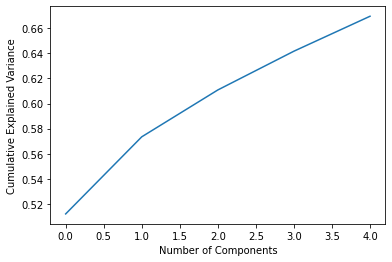

In [31]:
# Graph (Cumulative)

pca = PCA(5)
pca.fit_transform(scaled_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

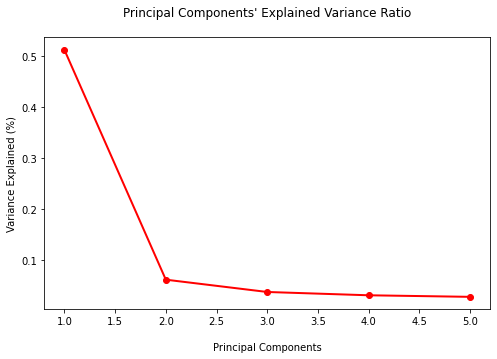

In [32]:
# Graph (Scree Plot)

PC_values = np.arange(pca.n_components) + 1
plt.figure(figsize=(8,5))
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth = 2)
plt.title('Principal Components\' Explained Variance Ratio\n')
plt.xlabel('\nPrincipal Components')
plt.ylabel('Variance Explained (%)')
plt.show()

### Feature Loadings

In [34]:
loadings = pd.DataFrame(abs(pca.components_.T), columns = ['PC{}'.format(i) for i in np.arange(1,6)], index = scaled_df.columns)
loadings.sort_values(by = 'PC1', ascending = False)

,PC1,PC2,PC3,PC4,PC5
ECEAVERAGE,0.213896,0.054942,0.060551,0.039379,0.045282
MATAVERAGE,0.211396,0.089633,0.058160,0.045963,0.029516
ELEAVERAGE,0.201272,0.148621,0.017720,0.062531,0.003834
SIGNALS,0.190695,0.129793,0.028338,0.076710,0.025968
CIRC1,0.187882,0.016649,0.072996,0.131315,0.092818
ELXDEVICE,0.187787,0.164648,0.045027,0.021463,0.008818
ENGECO,0.183155,0.002243,0.022178,0.047471,0.002685
ELXCIRCUITS,0.182854,0.009096,0.007880,0.022273,0.031757
ELEMAG,0.182504,0.194296,0.031102,0.030967,0.014488
TRIGO,0.181556,0.039645,0.008556,0.023424,0.005790
